In [156]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pyod.models.knn import KNN
from pyod.models.auto_encoder import AutoEncoder
from pyod.models.vae import VAE
from pyod.utils.data import generate_data
from pyod.utils.data import evaluate_print
from pyod.utils.example import visualize
from joblib import dump, load

In [157]:
contamination = 0.1 # percentage of outliers
n_train = 500       # number of training points
n_test = 500        # number of testing points
n_features = 2      # number of features

X_train, y_train, X_test, y_test = generate_data(
 n_train=n_train, n_test=n_test, n_features= n_features, contamination=contamination)

C:\Users\deepl\anaconda3\lib\site-packages\pyod\utils\data.py:185: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.8.0. Please use behaviour="new", which makes the returned datasets in the order of X_train, X_test, y_train, y_test.
  warn('behaviour="old" is deprecated and will be removed '


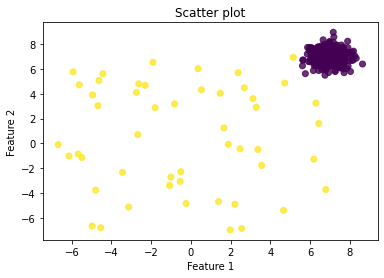

In [158]:
# Make the 2d numpy array a pandas dataframe for each manipulation 
X_train_pd = pd.DataFrame(X_train)
y_train_pd = pd.DataFrame(y_train)
    
# Plot
plt.scatter(X_train_pd[0], X_train_pd[1], c=y_train, alpha=0.8)
plt.title('Scatter plot')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

## Unsupervised KNN Example

In [159]:
# train kNN detector
clf_name = 'KNN'
clf = KNN()
clf.fit(X_train)

# get the prediction label and outlier scores of the training data
y_train_pred = clf.labels_  # binary labels (0: inliers, 1: outliers)
y_train_scores = clf.decision_scores_  # raw outlier scores

# get the prediction on the test data
y_test_pred = clf.predict(X_test)  # outlier labels (0 or 1)
y_test_scores = clf.decision_function(X_test)  # outlier scores

In [160]:
# save the model
dump(clf, 'clf.joblib')

# load the model
clf = load('clf.joblib')

In [161]:
y_train_scores[-60:]

array([0.11296177, 0.0831373 , 0.08011653, 0.09548204, 0.0570404 ,
       0.06508255, 0.12951503, 0.84885848, 0.07788685, 0.18176903,
       3.36807262, 3.44791276, 2.9388349 , 2.46195467, 3.81281857,
       2.5264292 , 3.04083538, 2.42734567, 4.72353018, 2.4656701 ,
       3.25203059, 2.77607957, 3.11213626, 2.0239029 , 2.13938642,
       2.0239029 , 2.03076216, 3.04454168, 3.93998983, 2.5922416 ,
       2.59214792, 2.92590782, 2.41948873, 2.5264292 , 2.81163481,
       3.45364939, 2.49679756, 2.07037445, 5.07144195, 3.40754198,
       2.54675801, 2.33775221, 2.09952287, 2.68650078, 4.72710776,
       2.10343469, 2.13183326, 3.00087889, 1.97730284, 2.71923675,
       2.3074711 , 2.22018187, 2.79382759, 3.34803771, 2.68228094,
       0.84185486, 3.06429613, 3.71165202, 2.3074711 , 1.93273113])

In [162]:
y_train_pred[-60:]

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1])

In [163]:
pd.DataFrame(y_test_pred).value_counts()

0    451
1     49
dtype: int64

In [164]:
# evaluate and print the results
print("\nOn Training Data:")
evaluate_print(clf_name, y_train, y_train_scores)

print("\nOn Test Data:")
evaluate_print(clf_name, y_test, y_test_scores)


On Training Data:
KNN ROC:1.0, precision @ rank n:0.98

On Test Data:
KNN ROC:1.0, precision @ rank n:1.0


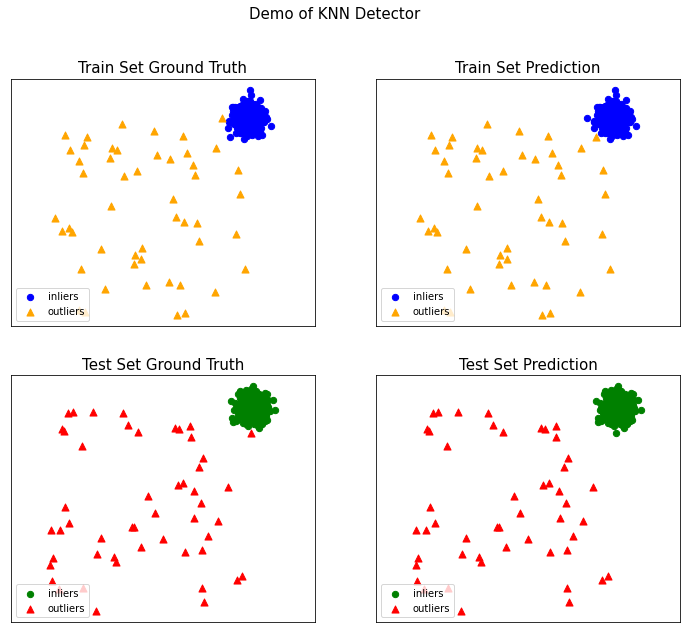

In [165]:
visualize(clf_name, X_train, y_train, X_test, y_test, y_train_pred,
    y_test_pred, show_figure=True, save_figure=False)

## Autoencoder Example

In [166]:
contamination = 0.1  # percentage of outliers
n_train = 20000      # number of training points
n_test = 2000        # number of testing points
n_features = 300     # number of features

In [167]:
# Generate sample data

X_train, y_train, X_test, y_test = generate_data(n_train=n_train,
                                                 n_test=n_test,
                                                 n_features=n_features,
                                                 contamination=contamination,
                                                 random_state=42)

C:\Users\deepl\anaconda3\lib\site-packages\pyod\utils\data.py:185: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.8.0. Please use behaviour="new", which makes the returned datasets in the order of X_train, X_test, y_train, y_test.
  warn('behaviour="old" is deprecated and will be removed '


In [168]:
# train AutoEncoder detector
clf_name = 'AutoEncoder'
clf = AutoEncoder(epochs=30, contamination=contamination)
clf.fit(X_train)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 300)               90300     
_________________________________________________________________
dropout_18 (Dropout)         (None, 300)               0         
_________________________________________________________________
dense_26 (Dense)             (None, 300)               90300     
_________________________________________________________________
dropout_19 (Dropout)         (None, 300)               0         
_________________________________________________________________
dense_27 (Dense)             (None, 64)                19264     
_________________________________________________________________
dropout_20 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_28 (Dense)             (None, 32)               

AutoEncoder(batch_size=32, contamination=0.1, dropout_rate=0.2, epochs=30,
      hidden_activation='relu', hidden_neurons=[64, 32, 32, 64],
      l2_regularizer=0.1,
      loss=<function mean_squared_error at 0x0000012E8C0FAD30>,
      optimizer='adam', output_activation='sigmoid', preprocessing=True,
      random_state=None, validation_size=0.1, verbose=1)

In [169]:
# get the prediction labels and outlier scores of the training data
y_train_pred = clf.labels_  # binary labels (0: inliers, 1: outliers)
y_train_scores = clf.decision_scores_  # raw outlier scores

# get the prediction on the test data
y_test_pred = clf.predict(X_test)  # outlier labels (0 or 1)
y_test_scores = clf.decision_function(X_test)  # outlier scores

# evaluate and print the results
print("\nOn Training Data:")
evaluate_print(clf_name, y_train, y_train_scores)
print("\nOn Test Data:")
evaluate_print(clf_name, y_test, y_test_scores)


On Training Data:
AutoEncoder ROC:1.0, precision @ rank n:1.0

On Test Data:
AutoEncoder ROC:1.0, precision @ rank n:1.0


## Variational Autoencoder Example

In [170]:
# Generate sample data
X_train, y_train, X_test, y_test = \
    generate_data(n_train=n_train,
                  n_test=n_test,
                  n_features=n_features,
                  contamination=contamination,
                  random_state=42)

# train VAE detector (Beta-VAE)
clf_name = 'VAE'
clf = VAE(epochs=30, contamination=contamination, gamma=0.8, capacity=0.2)
clf.fit(X_train)

# get the prediction labels and outlier scores of the training data
y_train_pred = clf.labels_  # binary labels (0: inliers, 1: outliers)
y_train_scores = clf.decision_scores_  # raw outlier scores

# get the prediction on the test data
y_test_pred = clf.predict(X_test)  # outlier labels (0 or 1)
y_test_scores = clf.decision_function(X_test)  # outlier scores

# evaluate and print the results
print("\nOn Training Data:")
evaluate_print(clf_name, y_train, y_train_scores)
print("\nOn Test Data:")
evaluate_print(clf_name, y_test, y_test_scores)

C:\Users\deepl\anaconda3\lib\site-packages\pyod\utils\data.py:185: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.8.0. Please use behaviour="new", which makes the returned datasets in the order of X_train, X_test, y_train, y_test.
  warn('behaviour="old" is deprecated and will be removed '


Model: "functional_7"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 300)]        0                                            
__________________________________________________________________________________________________
dense_32 (Dense)                (None, 300)          90300       input_3[0][0]                    
__________________________________________________________________________________________________
dense_33 (Dense)                (None, 128)          38528       dense_32[0][0]                   
__________________________________________________________________________________________________
dropout_24 (Dropout)            (None, 128)          0           dense_33[0][0]                   
_______________________________________________________________________________________